In [3]:
import pandas as  pd

# DATASET_PATH = 'dataset/dataset_with_proper_sentiment.json'

# neutral     32224
# negative    28654
# positive    25773
# DATASET_PATH = 'data/dataset_groundtruth.json'
# negative    35318
# positive    29595
# neutral     18131
# DATASET_PATH = 'data/dataset_groundtruth_test.json'
# negative    30613
# neutral     26823
# positive    25608
DATASET_PATH = 'data/2024_12_03_only_english.json'
df = pd.read_json(DATASET_PATH)
print(len(df))
drivers = df[df['drivers'].apply(lambda x: len(x) > 0)]
drivers_count = drivers['drivers'].value_counts()
drivers_count.to_csv('drivers_count.csv')
# negative    27741
# neutral     20913
# positive    20839
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Lemmatize and stem each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text
df['text'] = df['text'].apply(preprocess_text)


69493


In [8]:
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# Flatten the list of tokens
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Use a set to find unique words
unique_words = set(all_tokens)

# Count the unique words
unique_word_count = len(unique_words)

print(f"Total number of unique words: {unique_word_count}")

Total number of unique words: 30038


In [3]:
drivers_ = df[df.drivers.apply(len) > 0]
print(drivers_.drivers.value_counts().sum())
df.drivers.value_counts()


25872


drivers
[]                    43621
[Max Verstappen]       6180
[Lando Norris]         3760
[Lewis Hamilton]       3339
[Sergio Perez]         2026
[Carlos Sainz]         1808
[Charles Leclerc]      1699
[George Russell]       1315
[Oscar Piastri]        1254
[Lance Stroll]         1029
[Fernando Alonso]       795
[Yuko Tsunoda]          609
[Daniel Ricciardo]      457
[Kevin Magnussen]       403
[Alex Albon]            330
[Logan Sargeant]        225
[Valtteri Bottas]       201
[Esteban Ocon]          188
[Niko Hulkenberg]       106
[Pierre Gasly]           77
[Guan Yu Zhou]           71
Name: count, dtype: int64

In [4]:
# afin sentiment analysis
from afinn import Afinn

afinn = Afinn()

# add a column to the dataframe with the sentiment score

def map_score(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['afinn_score'] = df['text'].apply(lambda x: map_score(afinn.score(x)))
print(df.afinn_score.value_counts())
df.head(15)

afinn_score
neutral     29001
positive    27140
negative    13352
Name: count, dtype: int64


,text,drivers,sentiment,afinn_score
0,thi whi ricc career is over ... we see again t...,[Lance Stroll],negative,negative
1,hall cynthia jackson kimberli lewi sharon,[Lewis Hamilton],neutral,neutral
2,lee ronald hall brenda moor jeffrey,[],neutral,neutral
3,"here after singapor gp 2024 , oh how the tabl ...",[],negative,neutral
4,where 's the scream of the engin gone ? ❤,[],neutral,negative
5,"I 'm a red bull fan , so when the fia say noth...",[Max Verstappen],neutral,positive
6,red bull race 's last grand prix domin in the ...,[],neutral,positive
7,"magnuson and hulkenberg are so overr , they se...",[Niko Hulkenberg],negative,neutral
8,I rewatch thi onli for turn 1 😂,[],positive,neutral
9,"enjoy how magnusson is such a menac , that eve...",[Lance Stroll],negative,positive


0.507101434676874
[[10516  9406  7818]
 [ 1924 12195  6793]
 [  912  7400 12529]]


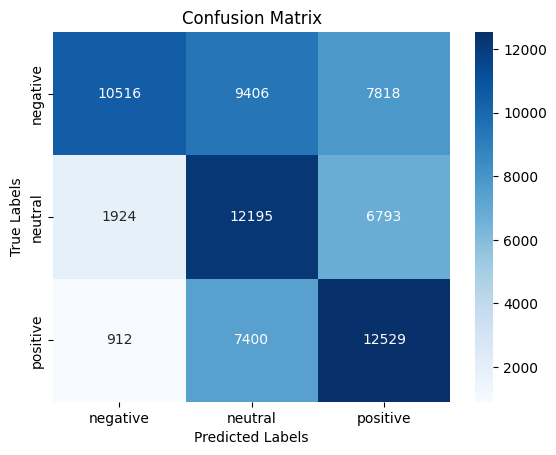

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print(accuracy_score(df['sentiment'], df['afinn_score']))
conf_matrix = confusion_matrix(df['sentiment'], df['afinn_score'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("afinn_confusion_matrix.png")
plt.show()

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kacper/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def map_score_vader(score):
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
df['vader_score'] = df['text'].apply(lambda x: map_score_vader(vader.polarity_scores(x)))
print(df.vader_score.value_counts())
print(accuracy_score(df['sentiment'], df['vader_score']))

vader_score
positive    28390
neutral     25870
negative    15233
Name: count, dtype: int64
0.5262544428935289


[[14422  6195  7123]
 [ 2629 10902  7381]
 [  970  4618 15253]]


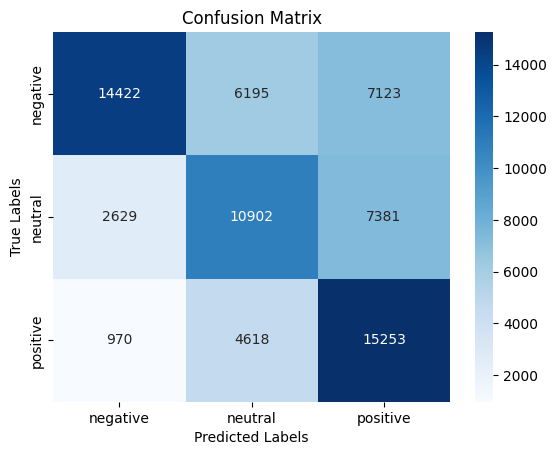

In [28]:
conf_matrix = confusion_matrix(df['sentiment'], df['vader_score'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("vader_confusion_matrix.png")
plt.show()

In [18]:
df.to_json('data/affin_vader.json', orient='records')
df = pd.read_json('data/affin_vader.json')

In [19]:
df_diff = df[(df['afinn_score'] != df['vader_score']) & (df['sentiment'] != df['vader_score'])]
df_diff.to_json('data/affin_vader_diff.json', orient='records')


In [20]:

fixed_df = pd.read_json('data/affin_vader_diff.json')
df.update(fixed_df)
df.head(15)

,text,drivers,sentiment,afinn_score,vader_score
0,"Enjoying how Magnusson is such a menace, that ...",[Lance Stroll],negative,neutral,positive
1,why isz the air gray,[],neutral,negative,neutral
2,Stroll is a troll,[Lance Stroll],negative,negative,neutral
3,You know it's China when u can't see the sky.....,[],negative,negative,neutral
4,I wish they would stop repeatedly saying Alons...,[Fernando Alonso],negative,neutral,positive
5,"Stopped watching after season opener , too pre...",[Fernando Alonso],negative,negative,positive
6,"Boring Boring, Boring. Here we go again. The h...",[],negative,negative,positive
7,I really wish F1 would find a new announcer. ...,[],negative,negative,positive
8,Stroll has to go. I can't believe that the oth...,[Lance Stroll],negative,negative,positive
9,Do you think Perez is an average driver ?\n.\n...,[Sergio Perez],negative,neutral,positive


In [22]:
df.to_json('data/2024_12_0_real.json', orient='records')

In [24]:
df.drivers.value_counts()
print(len(df) - 67139)

19512
